# Quick book glancer

As a linguistic book editor, this tool is to give me the first impressions of the new job.

In [1]:
import random

#upload new book here
text = "sources/rur.txt"
text_cs = "sources/rur_cs.txt" 

with open(text, "r", encoding='utf-8') as text:
    content = text.read()
    
with open(text_cs, "r", encoding='utf-8') as text_cs:
    content_cs = text_cs.read()

#print random middle part of the book and translation
random_words = random.randint(round(len(content)/4), round(len(content) - len(content)/4))
random_words_cs = random.randint(round(len(content_cs)/4), round(len(content_cs) - len(content_cs)/4)) 

print("SOME RANDOM PART OF THE BOOK\n", content[random_words:random_words+600],
      "\n\n*******************************\n",
      "SOME RANDOM PART OF THE TRANSLATION\n", content_cs[random_words_cs:random_words_cs+600])


SOME RANDOM PART OF THE BOOK
 . Good! (_Crosses to L. of L.C. table_) I don’t mind beginning
all over again. That suits me right down to the ground. (_Going through
papers on table._)

FABRY. And this little State of ours could be the center of future
life. A place of refuge where we could gather strength. Why, in a few
hundred years we could conquer the world again.

ALQUIST. You believe that even today?

FABRY. Yes!

BUSMAN. _Amen._ You see, Madame Helena, we’re not so badly off.

DOMIN. (_Storms into R. To R. of couch. Hoarsely_) Where’s old Rossum’s
manuscript? (_To R.C._)

BUSMAN. In your strong-box, of course.

DOMIN 

*******************************
 SOME RANDOM PART OF THE TRANSLATION
 í!

Domin: (tenor) Už je po ní!

Hallemeier: Už nás nikdy nedohoní

Helena: (s lahví a sklenicemi ve dveřích) Kdo vás nedohoní? Co máte?

Hallemeier: Máme radost. Máme vás. Máme všechno. Kruci turci, zrovna je
    tomu deset let, co jste přijela.

Dr. Gall: A na chlup po deseti letech

Hallemeier

### Getting some basic stats

In [2]:
length = round(len(content_cs)/1800)
rate_czk = 100

print('ESTIMATED NUMBER OF STANDARD PAGES - translation:')
print(length)
print('ESTIMATED COMPENSATION:')
print(str(length * rate_czk) + " CZK")

ESTIMATED NUMBER OF STANDARD PAGES - translation:
76
ESTIMATED COMPENSATION:
7600 CZK


### Getting better clue about the book

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag

import matplotlib.pyplot as plt, seaborn as sns

lemmatizer = WordNetLemmatizer()

#some data cleaning
#tokenizing text + removing stopwords & own list of stopwords + lemmatizing

tokens = word_tokenize(content)
stops = stopwords.words('english') + ['said', 'saw', 'see']
clean_tokens = [token for token in tokens if token.lower() not in stops and token.isalnum()]
lemmas = [lemmatizer.lemmatize(token) for token in clean_tokens]
tagged = pos_tag(lemmas)
#some extra cleaning
#filtering only common nouns, adjectives and verbs
value_tags = ['NN', 'NNS', 'JJ', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
value_words = [word[0] for word in tagged if word[1] in value_tags]

freq = FreqDist(value_words)

#printing most common words

print('SOME MOST COMMON WORDS FROM THE BOOK\n')
print(freq.most_common(30))

SOME MOST COMMON WORDS FROM THE BOOK

[('work', 104), ('u', 79), ('know', 59), ('table', 53), ('go', 49), ('year', 43), ('man', 42), ('make', 39), ('hand', 37), ('factory', 36), ('come', 36), ('world', 34), ('human', 31), ('good', 28), ('want', 28), ('think', 28), ('window', 27), ('look', 27), ('everything', 27), ('electronic', 27), ('take', 26), ('life', 26), ('old', 25), ('thing', 25), ('say', 25), ('room', 24), ('mean', 24), ('cross', 23), ('term', 22), ('law', 22)]


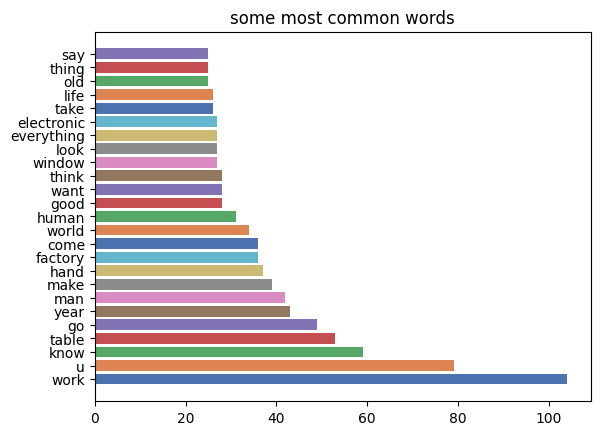

In [4]:
#plotting into bars
freq_dct_commons = dict(freq.most_common(25))

palette = sns.color_palette("deep")

plt.barh(list(freq_dct_commons.keys()), list(freq_dct_commons.values()), color=palette)
plt.title('some most common words')
plt.show()

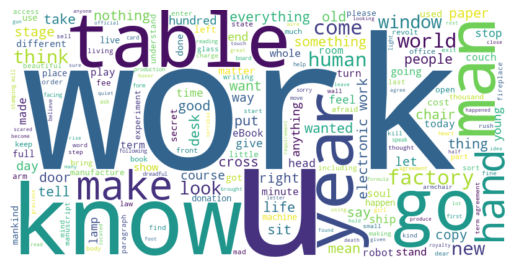

In [5]:
#as a word cloud
from wordcloud import WordCloud

text = " ".join(value_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Checking on my deadlines

In [6]:
import pandas as pd
from datetime import datetime, timedelta

schedule = pd.read_csv('sources/schedule.csv')

#defining steps
editing2 = schedule[schedule.Popis == "Finální redakce"]
proof = schedule[schedule.Popis == "Korektura 1"]

#date converter
def convert_date(step):
    start = step.iloc[0]['Od']
    end = step.iloc[0]['Do']
    start_formatted = datetime.strptime(start, "%d.%m.%Y").date()
    end_formatted = datetime.strptime(end, "%d.%m.%Y").date()
    return start_formatted, end_formatted

#counting days booked for given workflow without weekends
def count_weekdays(step):
    start, end = convert_date(step)
    days = (end - start).days
    weekdays = [day for day in range(days) if (start + timedelta(days=day)).weekday() < 5]
    return len(weekdays)

#counting average number of pages to do per day if I'm to meet deadlines
def pages_per_day(step):
    return round(length/count_weekdays(step), 2)
    
print(f'For second editing, you got {pages_per_day(editing2)} standard pages per day to edit.')
print(f'For proofreading, you got {pages_per_day(proof)} standard pages per day to read.')

For second editing, you got 2.53 standard pages per day to edit.
For proofreading, you got 3.62 standard pages per day to read.


#### I don't really care for standard pages - option to calculate Word or DTP pages manually:

In [7]:
def common_pages_day(total_pages, step):
    return round(float(total_pages)/count_weekdays(step), 2)

pages = common_pages_day(input('How many pages? '), editing2)
print(f'For second editing, you got {pages} Word pages per day to edit.')
pages_proof = common_pages_day(input('How many pages? '), proof)
print(f'For proofreading, you got {pages_proof} printed pages per day to read.')

How many pages?  250


For second editing, you got 8.33 Word pages per day to edit.


How many pages?  400


For proofreading, you got 19.05 printed pages per day to read.
